# TRABAJO SEMANAL 12

> ## Alumno: Fabrizio Hermosa
> ## Materia: Teoría de los circuitos II
> ## Curso: R4001

## <u> Consignas y desarrollo </u>  ##

In [1]:
from IPython.display import IFrame
IFrame("./TS12_TC2_R4001-FabrizioHermosa.pdf", width=900, height=1000)

## <u> Simulaciones numéricas y circuitales </u> ##

Para el **ejercicio 1** se comprueban los valores de los componentes calculados analíticamente mediante **simulación numérica**.

In [12]:
#Importo librerias de la catedra
import sympy as sp

from pytc2.sintesis_dipolo import cauer_RC, foster, foster_zRC2yRC
from pytc2.remociones import remover_polo_dc, remover_polo_jw, remover_valor_en_dc, remover_valor_en_infinito, remover_polo_sigma, remover_polo_infinito
from pytc2.general import print_latex, print_subtitle, a_equal_b_latex_s
from IPython.display import display, Markdown

s = sp.symbols('s', complex=True)

In [8]:
# Función de excitación

Z22 = (5*s**2 + 43*s + 68)/(s**2 + 5*s + 4)
Z22 = sp.nsimplify(Z22)

print_latex(a_equal_b_latex_s('Z_{22}(s)', Z22))


<IPython.core.display.Math object>

In [9]:
# Remoción total de polo en sigma = -1

sigma_R1C1 = 1
Z4, ZR1C1, R1, C1 = remover_polo_sigma(Z22, sigma=sigma_R1C1, isImpedance = True, isRC = True)
print_latex(a_equal_b_latex_s('Z_{R1C1}(s)', ZR1C1))
print_latex(a_equal_b_latex_s('Z_4(s)', Z4))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [11]:
# Remoción total de polo en sigma = -4

sigma_R2C2 = 4

Z6, ZR2C2, R2, C2 = remover_polo_sigma(Z4, sigma = sigma_R2C2, isImpedance = True, isRC = True)

print_latex(a_equal_b_latex_s('Z_{R2C2}', ZR2C2))

# Resistor en derivación
print_latex(a_equal_b_latex_s('Z_6(s)', Z6))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Usé la **simulación circuital** para comprobar el valor de Z21.

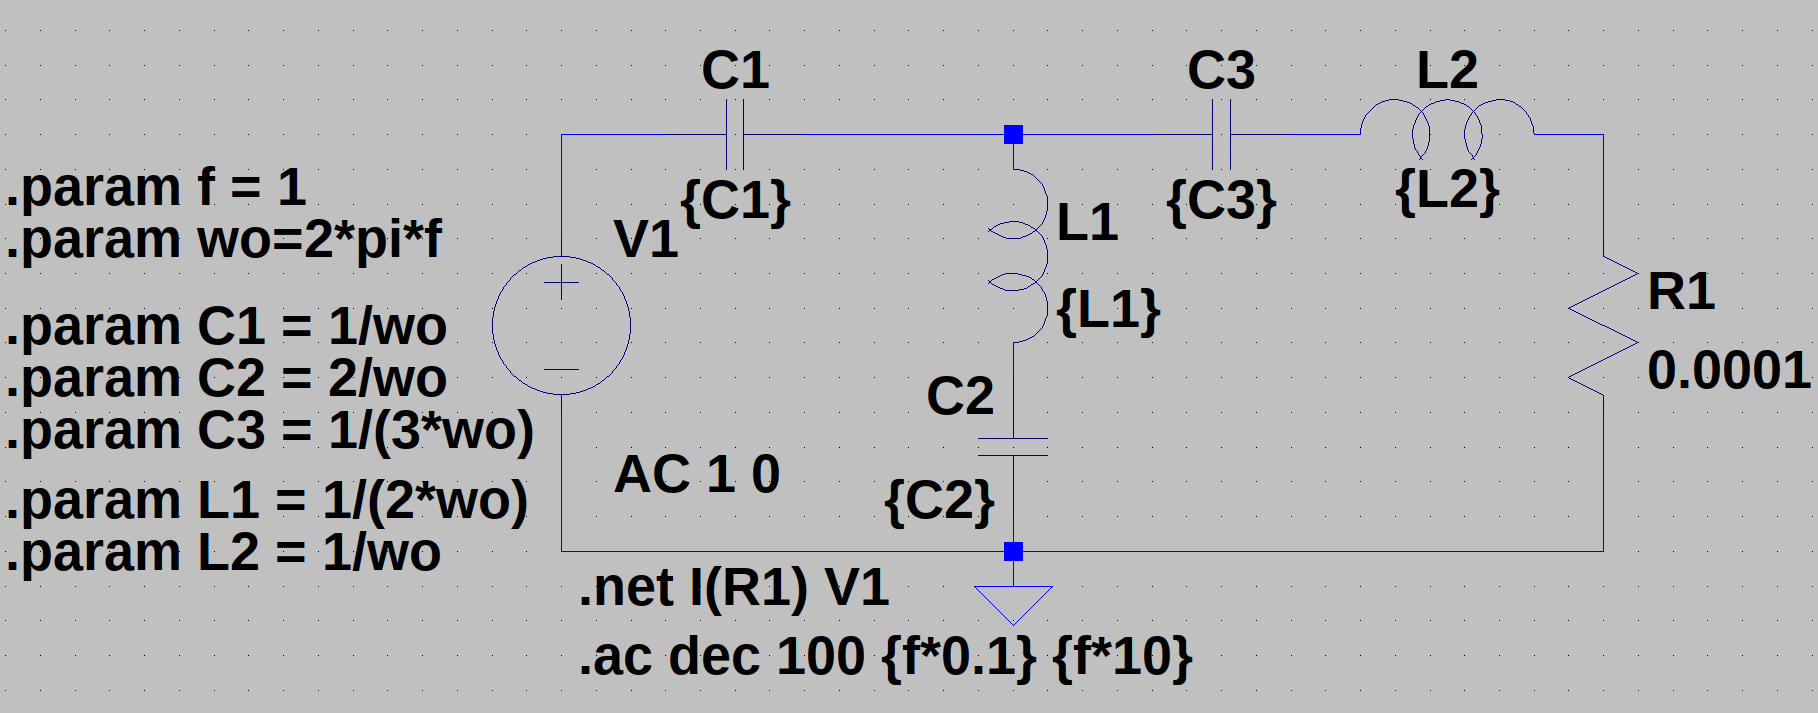

Siendo que Z21 = 6H y H = 5/6, Z21 debería ser 5 ohms.

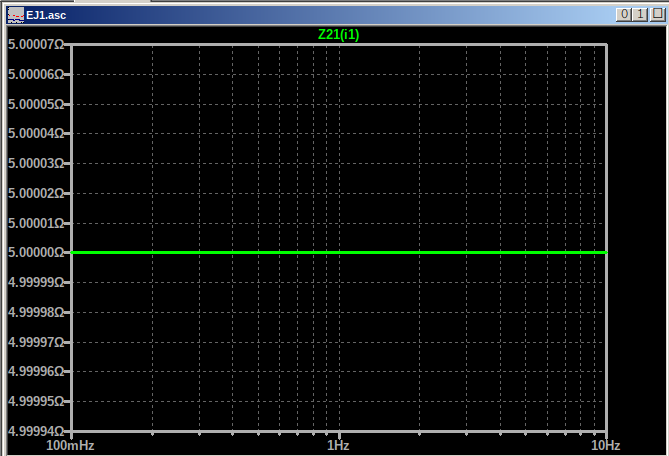


Se corrobora.

Para el **ejercicio 2** se procedió con lo mismo. Primero la **simulación numérica**.

In [14]:
# Función de excitación

Z22 = (2*s**2+1)/(s**3+2*s)

Z22 = sp.nsimplify(Z22)

print_latex(a_equal_b_latex_s('Z_{22}(s)', Z22))


<IPython.core.display.Math object>

In [17]:
# Remoción en infinito, capacitor C1 en derivación
Y4, KC1 = remover_polo_infinito(1/Z22)

Y4 = sp.nsimplify(Y4)

print_latex(a_equal_b_latex_s('Y_4(s)', Y4))
print_latex(a_equal_b_latex_s('K_{C1}', KC1))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [19]:
# Remoción parcial en infinito, inductor L1 en serie

Z6, KL1 = remover_polo_infinito(1/Y4, omega_zero = 3)

Z6 = sp.nsimplify(Z6)

print_latex(a_equal_b_latex_s('Z_6(s)', Z6))
print_latex(a_equal_b_latex_s('K_{L1}', KL1))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [20]:
# Queda un polo en -3, un LC serie en derivación

Y6 = 1/Z6

print_latex(a_equal_b_latex_s('Y_6(s)', Y6))

<IPython.core.display.Math object>

In [22]:
#Verificación matricial de la transimpedancia

from pytc2.cuadripolos import Z2Tabcd_s, Y2Tabcd_s, Tabcd2Z_s, Tabcd2Y_s

C1 = 1/2
L1 = 34/27
C2 = 3/2
L2 = 2/27

TY1 = sp.Matrix([
                    [1, 0],
                    [1/(s*L2+1/(s*C2)), 1]
                ])

TL1 = sp.Matrix([
                    [1, s*L1],
                    [0, 1]
                ])

TC1 = sp.Matrix([
                    [1, 0],
                    [s*C1, 1]
                ])

TRL = sp.Matrix([
                    [1, 0],
                    [1, 1]
                ])

T = TY1*TL1*TC1*TRL

T=sp.expand(T)
T=sp.nsimplify(T)
T=sp.expand(T)

print_latex(a_equal_b_latex_s('T', T))

<IPython.core.display.Math object>

In [23]:
C = T[1,0]

Ts = sp.factor(1/C)

print_latex(a_equal_b_latex_s('T(s)', Ts))

<IPython.core.display.Math object>

Se deduce $k = 1/9$.

**Simulación circuital** para comprobar la forma de la transferencia, que es un pasa bajos notch.

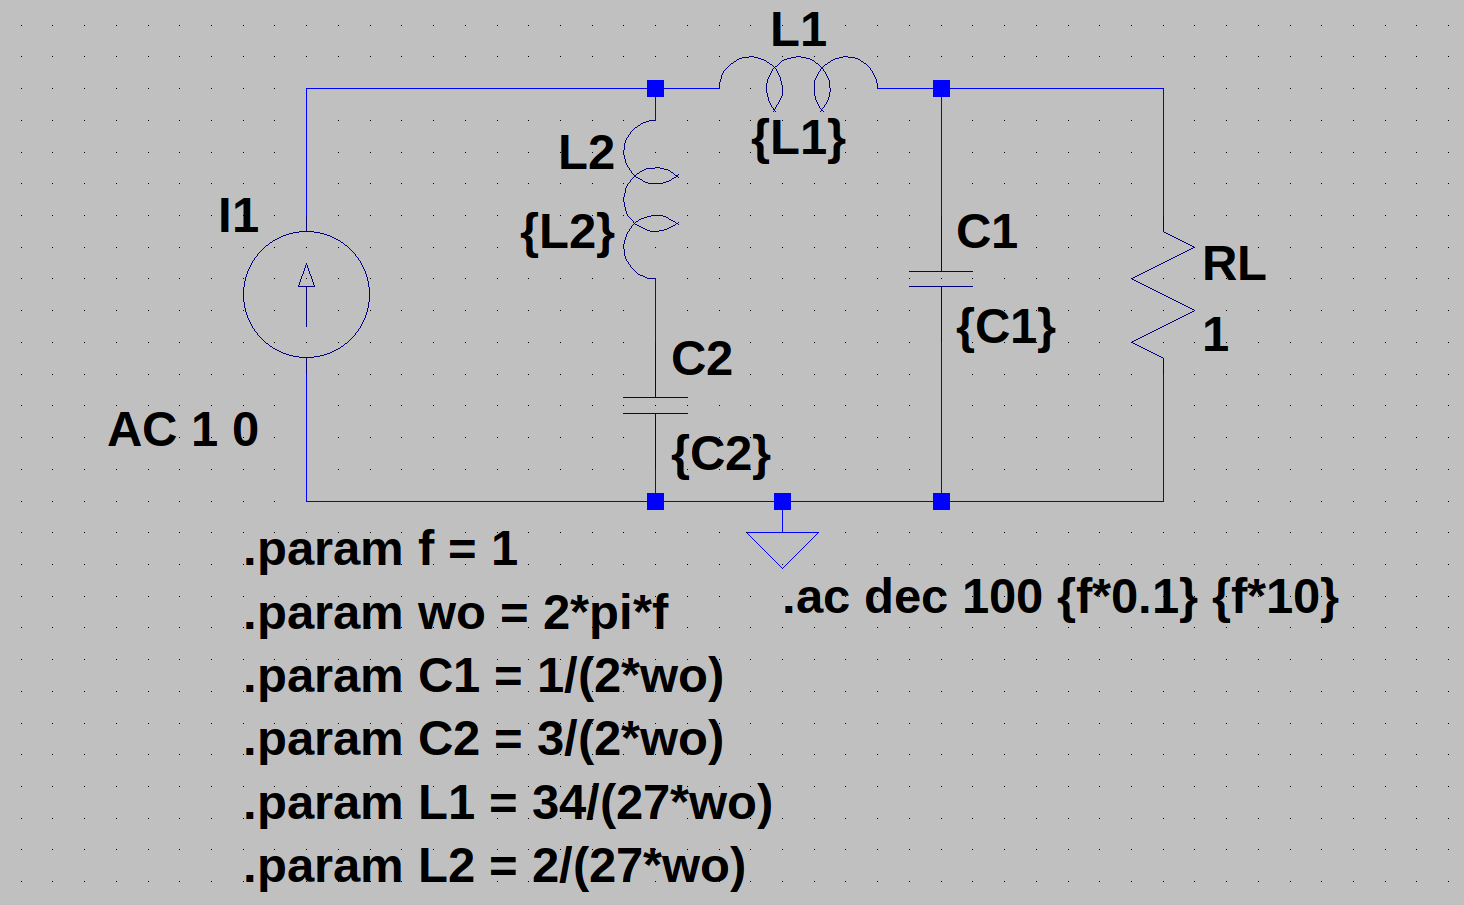

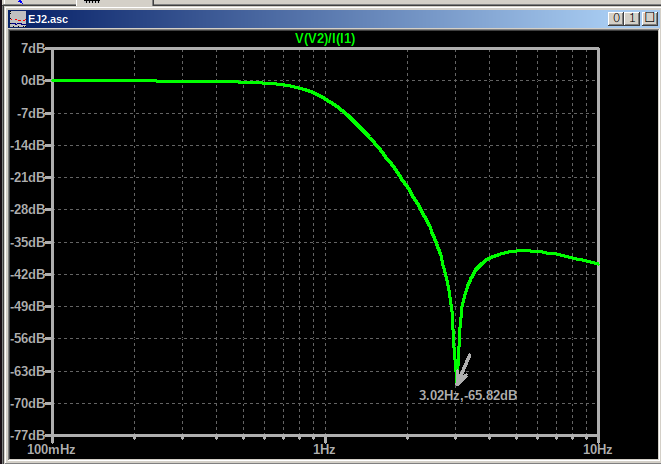

La forma es la esperada y se obtiene el cero de transmisión que indica el numerador, es decir, en 3Hz normalizados.